In [2]:
# Imports
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PyTorch libraries
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

/Users/guoj/opt/anaconda3/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/guoj/opt/anaconda3/lib/python3.8/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/guoj/opt/anaconda3/lib/python3.8/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 14.0.0 or later, but libjpeg.9.dylib provides version 12.0.0
  warn(f"Failed to load image Python extension: {e}")


<class 'torch.Tensor'>


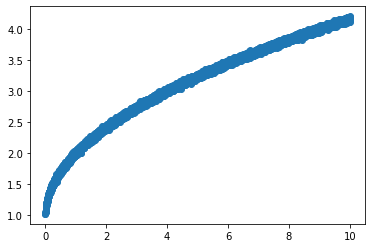

In [3]:
#simple linear regression using autogradient
x = torch.rand(10000)*10
y = x**0.5+1+torch.randn(10000)*0.02
print(type(y))
plt.scatter(x,y)

In [4]:
class network_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1,500),
            nn.ReLU(),
            nn.Linear(500,1),
        )
    
    def forward(self,x):
        return self.layers(x)

network = network_1()

print(network)
    
loss_function = nn.MSELoss()
lr = 0.01
sgd_optimizer = torch.optim.SGD(network.parameters(), lr=lr)

prediction = network(x.reshape(10000,1))

network_1(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=1, bias=True)
  )
)


In [5]:
lost_array=[]
for i in range(3000):
    sgd_optimizer.zero_grad()
    prediction = network(x.reshape(10000,1))
    loss = loss_function(prediction.reshape(-1), y)
    loss.backward()
    sgd_optimizer.step()
    lost_array.append(loss.item())

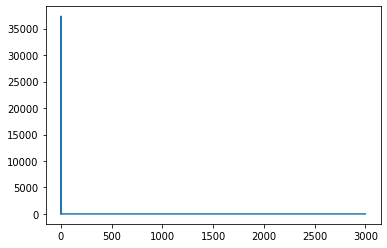

In [6]:
plt.plot(np.array(lost_array))

[1.9062679 2.9219139 3.365856  ... 2.591931  3.3972795 1.8163133]


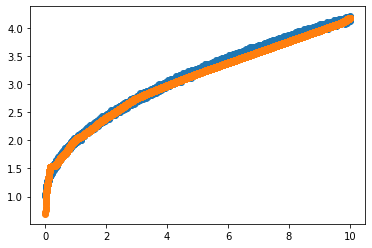

In [7]:
plt.scatter(x,y)
print(network(x.reshape(10000,1)).reshape(-1).detach().numpy())
plt.scatter(x,network(x.reshape(10000,1)).reshape(-1).detach().numpy())
plt.show()